In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.lines import Line2D
import os
import json
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from scipy.interpolate import make_interp_spline, BSpline
os.chdir("C:/Users/Zber/Documents/Dev_program/OpenRadar")
from FER.utils import MapRecord
from sklearn.model_selection import train_test_split

In [5]:
def annotation_update(record_list, width=100, total_frame=300):
    for record in record_list:
        # if record.num_frames < width:
        #     pad = (width - record.num_frames)//2
        #     if record.onset < pad:
        #         record.peak += pad*2

        #     elif (total_frame - record.peak) < pad:
        #         record.onset -= pad*2
        #     else:
        #         record.onset -= pad
        #         record.peak += pad
        # else:
        #     pad = record.num_frames - width
        #     record.peak -= pad

        record.path = record.path.replace("Raw_0.bin","{}.npy").replace("\\", "/")

        if record.num_frames != 100:
            record.peak += 1
        assert record.num_frames == 100, 'the num of frames must equal to 100!'
    return record_list


def annotation_attention(record_list, width=30):
    for record in record_list:
        record.onset = math.floor(record.onset * 3 / 10)
        record.peak = record.onset + width - 1
        record.path = record.relative_path.replace("_{}.npy","")
    return record_list


def annotation_append(subs=['S6','S7']):
    str_arr = []
    str_format = "{} {} {} {} {} {} {} {}"
    npy_path = "{}_{}"
    emotion = 'Neutral'
    # subs = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5']

    for sub in subs:
        for i in range(0,30):
            path = (os.path.join(sub, npy_path.format(emotion, i,)) + '_{}.npy').replace("\\", "/")
            label = "0"
            onset = 31
            peak = 130
            offset = -1
            e1 = 0
            e2 = 0
            e3 = 0
            str_arr.append(str_format.format(path, label, onset, peak, offset, e1, e2 , e3))
    return str_arr


def data_split(record_list):
    labels = [r.label for r in record_list]
    train, test = train_test_split(record_list, test_size=0.2, random_state=25, stratify=labels)
    return train, test

def hm_2_frame(root_path, hm_path, frame_path):
    record_list = [MapRecord(x.strip().split(), root_path) for x in open(hm_path)]

    new_record_list = annotation_attention(record_list)
    str_format = "{} {} {} {}\n"
    with open(frame_path, 'w') as f:
        for record in new_record_list:
            f.write(str_format.format(record.path, record.onset, record.peak, record.label))
    print("Write {} Records to txt file".format(len(new_record_list)))

def hm_2_landmark(root_path, hm_path, frame_path):
    record_list = [MapRecord(x.strip().split(), root_path) for x in open(hm_path)]

    new_record_list = annotation_attention(record_list)
    str_format = "{} {} {} {}\n"
    with open(frame_path, 'w') as f:
        for record in new_record_list:
            re_pa = record.path.replace("_{}","")+".npy"
            f.write(str_format.format(re_pa, record.onset, record.peak, record.label))
    print("Write {} Records to txt file".format(len(new_record_list)))


In [15]:
def append_record_to_file(record_list, file):
    str_format = "{} {} {} {} {} {} {} {}"
    with open(file, 'a') as f:
        for record in record_list:
            f.write(str_format.format(record.path, record.label, record.onset, record.peak,
                    record.offset, record.width_err, record.height_err, record.index_err)+'\n')
    print("Write {} Records to txt file".format(len(record_list)))

### Heatmap annotation file to frame annotation file

In [ ]:
from FER.utils import get_label

# loading data configure
annotation_save_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\"
str_arr = []
# str format: path, label, onset, peak, offset, widthError, heightError, indexError
str_format = "{} {} {} {} {} {} {} {}"

emotion_list = ['Joy', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
subs = ['W1']
adc_path = "{}_{}"

start_index = 0
end_index = 10
onset = 41
peak = 140

for sub in subs:
    for e in emotion_list:
        for i in range(start_index, end_index):
            relative_path = sub + '/' +adc_path.format(e, i))+ '_{}.npy'
            out = [onset, peak, -1, 0, 0, 0]
            label = get_label(e)
            str_arr.append(str_format.format(relative_path, label, *out))

with open(os.path.join(annotation_save_path, "heatmap_annotation_test_wearmask.txt"), 'a') as f:
    f.writelines('\n'.join(str_arr))
print("Write {} Records to txt file".format(len(str_arr)))

In [18]:
root_path = ""
# new_heatmap = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\annotations_v3.txt"
new_heatmap_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\annotations_S8_new.txt"

train_ann_og = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_new.txt"
train_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_S8.txt"
test_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_S8.txt"

og_train_list = [MapRecord(x.strip().split(), root_path) for x in open(train_ann_og)]
record_list = [MapRecord(x.strip().split(), root_path) for x in open(new_heatmap_ann)]
train_list, test_list = train_test_split(record_list)
train_list = og_train_list + train_list
import random
random.shuffle(train_list)

In [26]:
new_heatmap_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\annotations_S8_new.txt"

train_ann_og = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_new.txt"
test_ann_og = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_new.txt"

og_train_list = [MapRecord(x.strip().split(), root_path) for x in open(train_ann_og)]
og_test_list = [MapRecord(x.strip().split(), root_path) for x in open(test_ann_og)]
ONSET = 31
PEAK = 130
for r in og_train_list:
    r.onset = ONSET
    r.peak = PEAK
for r in og_test_list:
    r.onset = ONSET
    r.peak = PEAK


record_list = [MapRecord(x.strip().split(), root_path) for x in open(new_heatmap_ann)]
train_list, test_list = train_test_split(record_list)
train_list = og_train_list + train_list
import random
random.shuffle(train_list)
test_list = og_test_list + test_list
print(len(train_list))
print(len(test_list))

1288
347


In [27]:
train_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_S8_constant.txt"
test_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_S8_constant.txt"
append_record_to_file(train_list, train_ann)
append_record_to_file(test_list, test_ann)

Write 1288 Records to txt file
Write 347 Records to txt file


In [14]:
subs=['S6','S7']
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap"
new_heatmap = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\annotations_v3.txt"
new_heatmap_ann = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\annotations_S8_new.txt"
record_list = [MapRecord(x.strip().split(), "") for x in open(new_heatmap)]
ONSET = 31
PEAK = 130
for r in record_list:
    r.onset = ONSET
    r.peak = PEAK

record_list = annotation_update(record_list)
neutral_list = annotation_append(['S6', 'S7'])

str_format = "{} {} {} {} {} {} {} {}"
# with open(new_heatmap_ann, 'w') as f:
#     for record in record_list:
#         f.write(str_format.format(record.path, record.label, record.onset, record.peak,
#                 record.offset, record.width_err, record.height_err, record.index_err)+'\n')
# print("Write {} Records to txt file".format(len(record_list)))


with open(new_heatmap_ann, 'a') as f:
    for record in neutral_list:
        f.write(record+'\n')
print("Write {} Records to txt file".format(len(neutral_list)))




# neutral_list = annotation_append(['S6', 'S7'])
# print(len(record_list))
# record_list = record_list + neutral_list
# print(len(record_list))
# train, test = data_split(record_list)
# print(len(train))
# print(len(test))

Write 60 Records to txt file


In [62]:
root_path = ""
hm_train = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_S8_v1.txt"
frame_train = "C:\\Users\\Zber\\Desktop\\Subjects_Frames\\video_annotation_train_S8_v1.txt"
hm_2_frame(root_path, hm_train, frame_train)

hm_test = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_S8_v1.txt"
frame_test = "C:\\Users\\Zber\\Desktop\\Subjects_Frames\\video_annotation_test_S8_v1.txt"
hm_2_frame(root_path, hm_test, frame_test)

Write 1216 Records to txt file
Write 333 Records to txt file


In [8]:
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap"
hm_train = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_new.txt"
frame_train = "C:\\Users\\Zber\\Desktop\\Subjects_Frames\\video_annotation_train_new.txt"
hm_2_frame(root_path, hm_train, frame_train)

hm_test = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_new.txt"
frame_test = "C:\\Users\\Zber\\Desktop\\Subjects_Frames\\video_annotation_test_new.txt"
hm_2_frame(root_path, hm_test, frame_test)

Write 973 Records to txt file
Write 242 Records to txt file


In [7]:
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap"
hm_train = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_new.txt"
landmark_train = "C:\\Users\\Zber\\Desktop\\Subjects_Landmark\\landmark_annotation_train_new.txt"
hm_2_landmark(root_path, hm_train, landmark_train)

hm_test = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_new.txt"
landmark_test = "C:\\Users\\Zber\\Desktop\\Subjects_Landmark\\landmark_annotation_test_new.txt"
hm_2_landmark(root_path, hm_test, landmark_test)

Write 973 Records to txt file
Write 242 Records to txt file


In [5]:
og_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap_Large\\heatmap_annotation_full_test.txt"
new_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap_Large\\heatmap_annotation_full_test_new.txt"
og = open(og_path, 'r')
new = open(new_path, 'w')

def check_name(name):
    for exp in exp_list:
        if ("S5/"+exp) in name:
            return False
    return True

for l in og:
    if check_name(l):
        new.write(l)
og.close()
new.close()

NameError: name 'exp_list' is not defined

In [51]:
arr = []
annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_S8.txt"
# annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_S8.txt"
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap"

record_list = [MapRecord(x.strip().split(), root_path) for x in open(annotaton_path)]

# ele = [-np.inf]

for record in record_list:
    
    npy_path_ele = record.path.format('ele')
    npy_path_azi = record.path.format('azi')

    ele = np.load(npy_path_ele).flatten()
    azi = np.load(npy_path_azi).flatten()

    ele = np.mean(ele)
    azi = np.mean(azi)

    # if ele == np.NINF or ele==np.Inf or azi == np.NINF or azi==np.Inf:
    if ele == np.NINF or azi == np.NINF:
        print(record.path)

C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Disgust_4_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Anger_5_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Neutral_24_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Anger_22_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Fear_26_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Surprise_5_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Anger_15_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Sadness_17_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Anger_25_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Sadness_22_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Joy_2_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Surprise_28_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Joy_11_{}.npy
C:\Users\Zber\Desktop\Subjects_Heatmap\S6/Neutral_11_{}.npy


In [59]:
text_path = "C:\\Users\\Zber\Desktop\\invalid_data.txt"
annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_S8.txt"
root_path = ""

record_list = [MapRecord(x.strip().split(), root_path) for x in open(annotaton_path)]

print(len(record_list))
with open(text_path) as f:
    lines = f.readlines()

count = 0
for l in lines:
    l = l[:-1]
    for index, r in enumerate(record_list):
        if l in r.path:
            print(r.path)
            record_list.pop(index)
            count += 1



new_annotation_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train_S8_v1.txt"
append_record_to_file(record_list, new_annotation_path)


1288
S6/Anger_6_{}.npy
S6/Disgust_13_{}.npy
S6/Sadness_11_{}.npy
S6/Joy_1_{}.npy
S6/Sadness_24_{}.npy
S6/Sadness_4_{}.npy
S6/Anger_18_{}.npy
S6/Anger_3_{}.npy
S6/Neutral_25_{}.npy
S6/Anger_11_{}.npy
S6/Neutral_1_{}.npy
S6/Disgust_1_{}.npy
S6/Neutral_3_{}.npy
S6/Joy_16_{}.npy
S6/Joy_6_{}.npy
S6/Joy_7_{}.npy
S6/Sadness_6_{}.npy
S6/Joy_22_{}.npy
S6/Surprise_21_{}.npy
S6/Neutral_12_{}.npy
S6/Neutral_16_{}.npy
S6/Surprise_23_{}.npy
S6/Neutral_23_{}.npy
S6/Fear_1_{}.npy
S6/Neutral_6_{}.npy
S6/Sadness_19_{}.npy
S6/Joy_4_{}.npy
S6/Joy_9_{}.npy
S6/Disgust_27_{}.npy
S6/Disgust_22_{}.npy
S6/Joy_3_{}.npy
S6/Anger_1_{}.npy
S6/Anger_26_{}.npy
S6/Neutral_17_{}.npy
S6/Surprise_8_{}.npy
S6/Disgust_26_{}.npy
S6/Anger_9_{}.npy
S6/Disgust_24_{}.npy
S6/Surprise_3_{}.npy
S6/Surprise_15_{}.npy
S6/Anger_29_{}.npy
S6/Sadness_29_{}.npy
S6/Neutral_18_{}.npy
S6/Anger_4_{}.npy
S6/Joy_25_{}.npy
S6/Sadness_13_{}.npy
S6/Surprise_6_{}.npy
S6/Disgust_16_{}.npy
S6/Neutral_15_{}.npy
S6/Surprise_2_{}.npy
S6/Neutral_10_{}.

In [61]:
text_path = "C:\\Users\\Zber\Desktop\\invalid_data_test.txt"
annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_S8.txt"
root_path = ""

record_list = [MapRecord(x.strip().split(), root_path) for x in open(annotaton_path)]

print(len(record_list))
with open(text_path) as f:
    lines = f.readlines()

count = 0
for l in lines:
    l = l[:-1]
    for index, r in enumerate(record_list):
        if l in r.path:
            # print(r.path)
            record_list.pop(index)
            count += 1



new_annotation_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test_S8_v1.txt"
append_record_to_file(record_list, new_annotation_path)

347
Write 333 Records to txt file


In [3]:
heatmap_path_1 = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\S1\\Anger_0_azi.npy"
heatmap_path_2 = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\S6\\Anger_0_azi.npy"
h1 = np.load(heatmap_path_1)
h2 = np.load(heatmap_path_2)
 
h1_mean = np.mean(h1)
h2_mean = np.mean(h2)
print(h1_mean)
print(h2_mean)

73.13816750796464
73.92823863686587


In [43]:
print("iiii".index('i'))

0


# mean and std

In [44]:
arr = []
annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train.txt"
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap"

record_list = [MapRecord(x.strip().split(), root_path) for x in open(annotaton_path)]

ele = [-np.inf]

for record in record_list:
    
    npy_path = record.path.format('ele')
    d = np.load(npy_path).flatten()
    mask = np.isin(d, ele)
    if len(d[mask]) >0:
        print(npy_path)
    arr.append(d)

arr = np.concatenate(arr, axis=0)

mean = np.mean(arr)
std = np.std(arr)
print("Mean : {}".format(mean))
print("STD : {}".format(std))


Mean : 86.07235512709005
STD : 5.921389444342834


In [45]:
arr = []
annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap_Large\\heatmap_annotation_train.txt"
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap_Large"

record_list = [MapRecord(x.strip().split(), root_path) for x in open(annotaton_path)]
train = []

ele = [-np.inf, np.inf, 0]

for record in record_list:
    
    npy_path = record.path.format('azi')
    d = np.load(npy_path).flatten()
    # mask = d > 1000
    mask = np.isin(d, ele)
    if len(d[mask]) >0:
        print(npy_path)
    # arr.append(d)
    else:
        train.append(record)

# arr = np.concatenate(arr, axis=0)


# str_format = "{} {} {} {} {} {} {} {}"
# with open(os.path.join(root_path, "heatmap_annotation_train.txt"), 'a') as f:
#     for record in train:
#         f.write(str_format.format(record.relative_path, record.label, record.onset, record.peak, record.offset, record.width_err, record.height_err, record.index_err)+'\n')
# print("Write {} Records to txt file".format(len(train)))

In [46]:
root_path = "C:\\Users\\Zber\\Desktop\\Subjects_Frames"
# annotaton_path = "D:\\Subjects\\annotations_v2.txt"
# annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation.txt"
annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train.txt"
# annotaton_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test.txt"

record_list = [MapRecord(x.strip().split(), root_path) for x in open(annotaton_path)]

# new_record_list = annotation_update(record_list)
#
# # str format: path, label, onset, peak, offset, widthError, heightError, indexError
# str_format = "{} {} {} {} {} {} {} {}"
# with open(os.path.join(root_path, "heatmap_annotation.txt"), 'a') as f:
#     for record in new_record_list:
#         f.write(str_format.format(record.path, record.label, record.onset, record.peak, record.offset, record.width_err, record.height_err, record.index_err)+'\n')
# print("Write {} Records to txt file".format(len(new_record_list)))

# train, test = data_split(record_list)

# str format: path, label, onset, peak, offset, widthError, heightError, indexError
# str_format = "{} {} {} {} {} {} {} {}"
# with open(os.path.join(root_path, "heatmap_annotation_train.txt"), 'a') as f:
#     for record in train:
#         f.write(str_format.format(record.path, record.label, record.onset, record.peak, record.offset, record.width_err, record.height_err, record.index_err)+'\n')
# print("Write {} Records to txt file".format(len(train)))
#
# with open(os.path.join(root_path, "heatmap_annotation_test.txt"), 'a') as f:
#     for record in test:
#         f.write(str_format.format(record.path, record.label, record.onset, record.peak, record.offset, record.width_err, record.height_err, record.index_err)+'\n')
# print("Write {} Records to txt file".format(len(test)))


# str_arr = annotation_append()
# with open(annotaton_path, 'a') as f:
#     f.writelines('\n'.join(str_arr))
# print("Write {} Records to txt file".format(len(str_arr)))

new_record_list = annotation_attention(record_list)
str_format = "{} {} {} {}\n"
with open(os.path.join(root_path, "annotations_att_train.txt"), 'w') as f:
    for record in new_record_list:
        f.write(str_format.format(record.path, record.onset, record.peak, record.label))
print("Write {} Records to txt file".format(len(new_record_list)))

Write 979 Records to txt file


In [47]:
annotation_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_train.txt"
new_annotation_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_full_train.txt"
root_path = ""
record_list = [MapRecord(x.strip().split(), root_path)
               for x in open(annotation_path)]

str_format = "{} {} {} {} {} {} {} {}"
with open(new_annotation_path, 'w') as f:
    for record in record_list:
        record.onset = 0
        record.peak = 299
        f.write(str_format.format(record.path, record.label, record.onset, record.peak,
                record.offset, record.width_err, record.height_err, record.index_err)+'\n')
print("Write {} Records to txt file".format(len(record_list)))


Write 979 Records to txt file


In [48]:
annotation_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_test.txt"
new_annotation_path = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap\\heatmap_annotation_full_test.txt"
root_path = ""
record_list = [MapRecord(x.strip().split(), root_path)
               for x in open(annotation_path)]

str_format = "{} {} {} {} {} {} {} {}"
with open(new_annotation_path, 'w') as f:
    for record in record_list:
        record.onset = 0
        record.peak = 299
        f.write(str_format.format(record.path, record.label, record.onset, record.peak,
                record.offset, record.width_err, record.height_err, record.index_err)+'\n')
print("Write {} Records to txt file".format(len(record_list)))


Write 252 Records to txt file


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class NST(nn.Module):
	def __init__(self):
		super(NST, self).__init__()

	def forward(self, fm_s, fm_t):
		fm_s = fm_s.view(fm_s.size(0), fm_s.size(1), -1)
		fm_s = F.normalize(fm_s, dim=2)

		fm_t = fm_t.view(fm_t.size(0), fm_t.size(1), -1)
		fm_t = F.normalize(fm_t, dim=2)

		loss = self.poly_kernel(fm_t, fm_t).mean() \
			 + self.poly_kernel(fm_s, fm_s).mean() \
			 - 2 * self.poly_kernel(fm_s, fm_t).mean()

		return loss

	def poly_kernel(self, fm1, fm2):
		fm1 = fm1.unsqueeze(1)
		fm2 = fm2.unsqueeze(2)
		out = (fm1 * fm2).sum(-1).pow(2)

		return out

In [50]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 4, requires_grad=True)
model = NST()

loss = model(input, target)

print(loss.value)


AttributeError: 'Tensor' object has no attribute 'value'

In [ ]:
class SP(nn.Module):
	'''
	Similarity-Preserving Knowledge Distillation
	https://arxiv.org/pdf/1907.09682.pdf
	'''
	def __init__(self):
		super(SP, self).__init__()

	def forward(self, fm_s, fm_t):
		fm_s = fm_s.view(fm_s.size(0), -1)
		G_s  = torch.mm(fm_s, fm_s.t())
		norm_G_s = F.normalize(G_s, p=2, dim=1)

		fm_t = fm_t.view(fm_t.size(0), -1)
		G_t  = torch.mm(fm_t, fm_t.t())
		norm_G_t = F.normalize(G_t, p=2, dim=1)

		loss = F.mse_loss(norm_G_s, norm_G_t)

		return loss

In [ ]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 4, requires_grad=True)
model = SP()
loss = model(input, target)
print(loss.detach().numpy())

In [ ]:
os.chdir("../..")
from FER.em_network.models.c3d import C3DFusionBaseline
device = 'cuda'
m = C3DFusionBaseline(100, 7)
i = 0
for p in m.parameters():
    print(p.size())
    i += 1

print(i)

torch.Size([16, 1, 3, 7, 3])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32, 16, 3, 7, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([16, 1, 3, 7, 3])
torch.Size([16])
torch.Size([16])
torch.Size([16])
torch.Size([32, 16, 3, 7, 3])
torch.Size([32])
torch.Size([32])
torch.Size([32])
torch.Size([64, 32, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([64, 64, 3, 7, 3])
torch.Size([64])
torch.Size([64])
torch.Size([64])
torch.Size([1024, 6144])
torch

In [ ]:
from FER
root = "C:\\Users\\Zber\\Desktop\\Subjects_Heatmap_Large"
path = "S2/Disgust_0_{}"


In [ ]:
x1 = np.arange(9.0).reshape((3, 3))
x2 = np.arange(3.0)

In [ ]:
print(x2)

[0. 1. 2.]


viscm not found, falling back on simple display


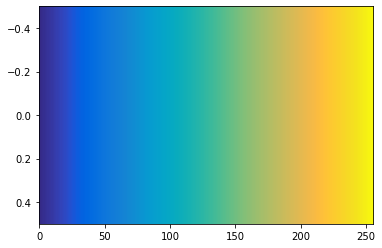

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()